In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

In [2]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [2]:
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [4]:
data

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [5]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [8]:
#no null values

In [9]:
#no need to encode as well

In [10]:
#outlier handling

In [11]:
data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [12]:
data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

<Axes: >

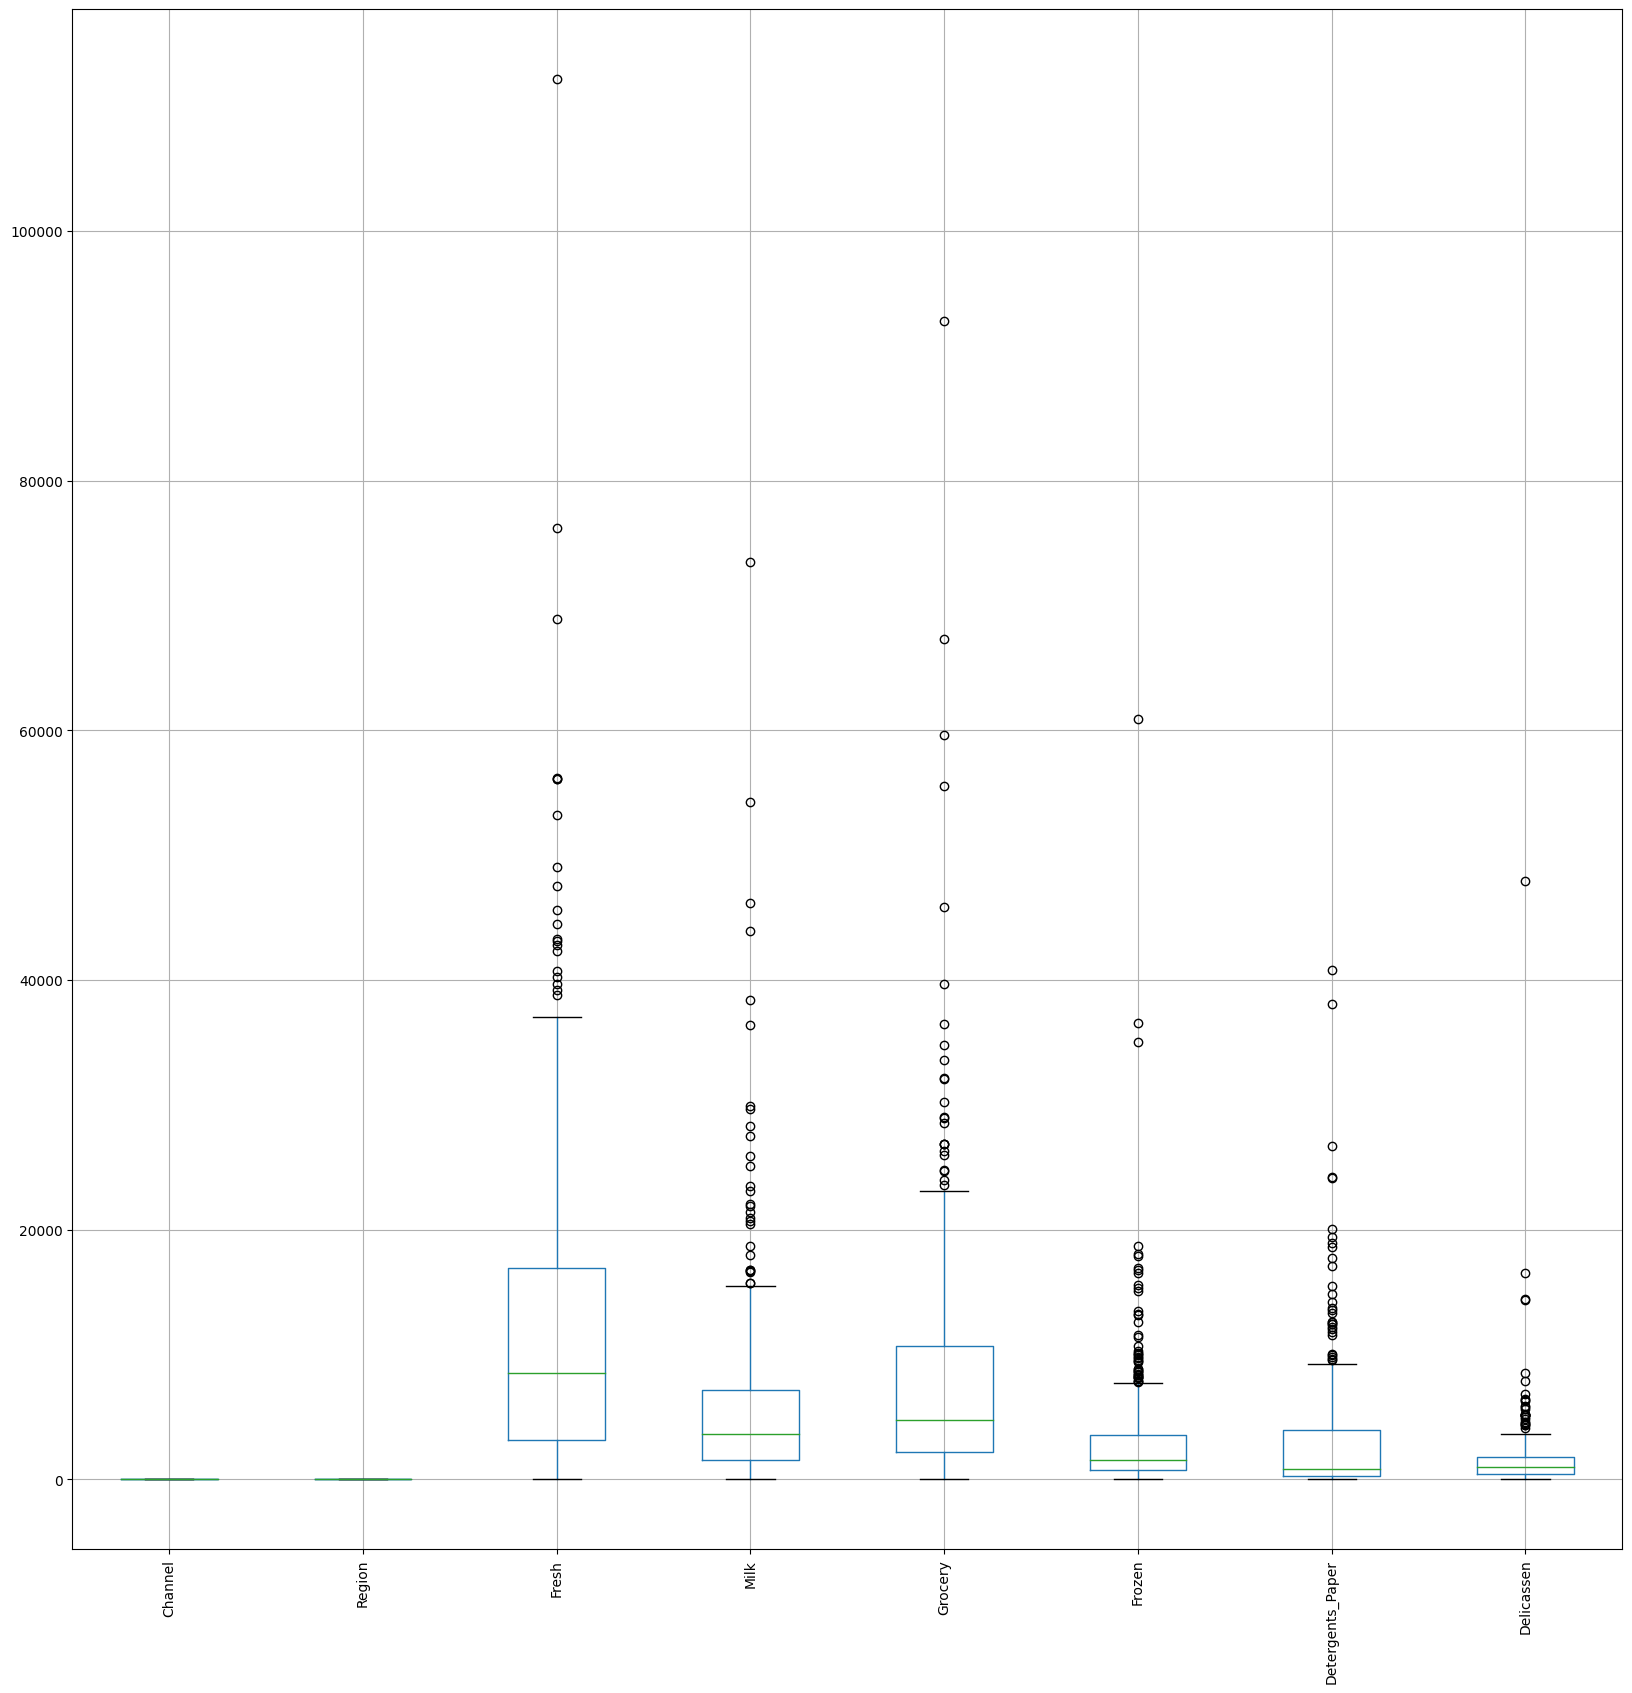

In [13]:
data.boxplot(rot=90,figsize=(20,20))

In [14]:
'''it is possible to have extreme demand for commodities like milk, groceries, detergents and other mentioned items
 thus outliers can't be fixed in this data set'''

"it is possible to have extreme demand for commodities like milk, groceries, detergents and other mentioned items\n thus outliers can't be fixed in this data set"

In [15]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [16]:
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [17]:
#scaling is not done for this dataset. only performing it for pca

In [18]:
x = data

In [19]:
# kMeans

In [21]:
wcss = []
k_clusters = np.arange(1,21)
for i in k_clusters:
  km = KMeans(init ='k-means++', n_clusters=i,n_init=20)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)


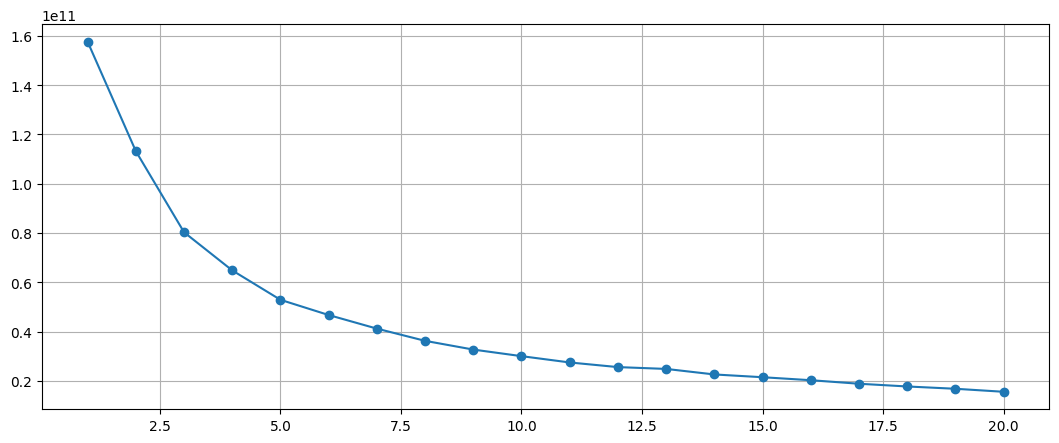

In [22]:
plt.figure(figsize=(13,5))
plt.plot(k_clusters,wcss,'o-')
plt.grid()

In [23]:
#using silhouettescore

In [24]:
silhouette_scr = []
k_clusters = np.arange(2,21)
for i in k_clusters:
  km = KMeans(init ='k-means++', n_clusters=i,n_init=20)
  km.fit(x)
  clst_lbl_sh = km.predict(x)
  sh_sc = silhouette_score(x ,clst_lbl_sh)
  silhouette_scr.append(sh_sc)

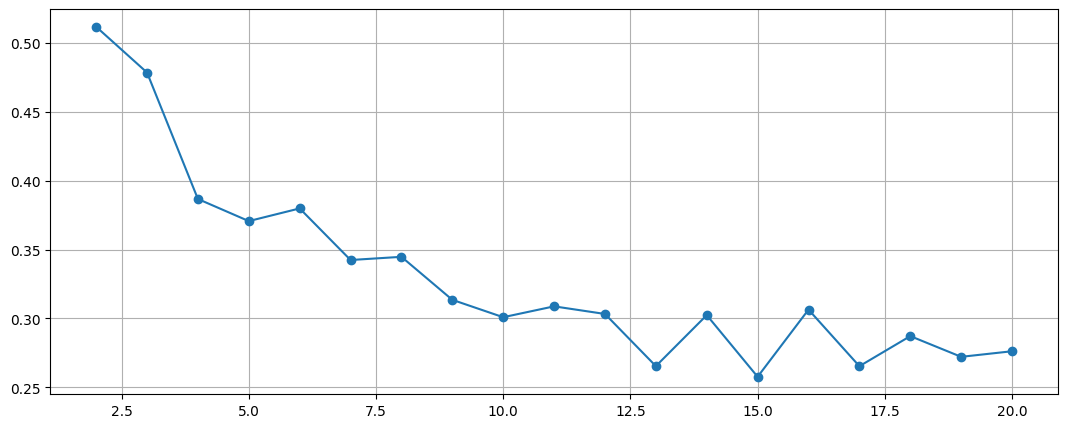

In [25]:
plt.figure(figsize=(13,5))
plt.plot(k_clusters,silhouette_scr,'o-')
plt.grid()

In [26]:
#in elbow method 3 was the optimum cluster no and silhoutte score places 3 as the second better classified cluster no
#thus cluster no is chosen to be 3

In [27]:
#at 3 clusters

In [28]:
km = KMeans(init ='k-means++',n_clusters=3,n_init=20)
km.fit(x)

KMeans(n_clusters=3, n_init=20)

In [29]:
cluster_labels = km.predict(x)

In [30]:
pd.Series(cluster_labels).value_counts()

1    330
0     60
2     50
dtype: int64

In [31]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [33]:
df2 = data.assign(Cluster_Labels=cluster_labels)

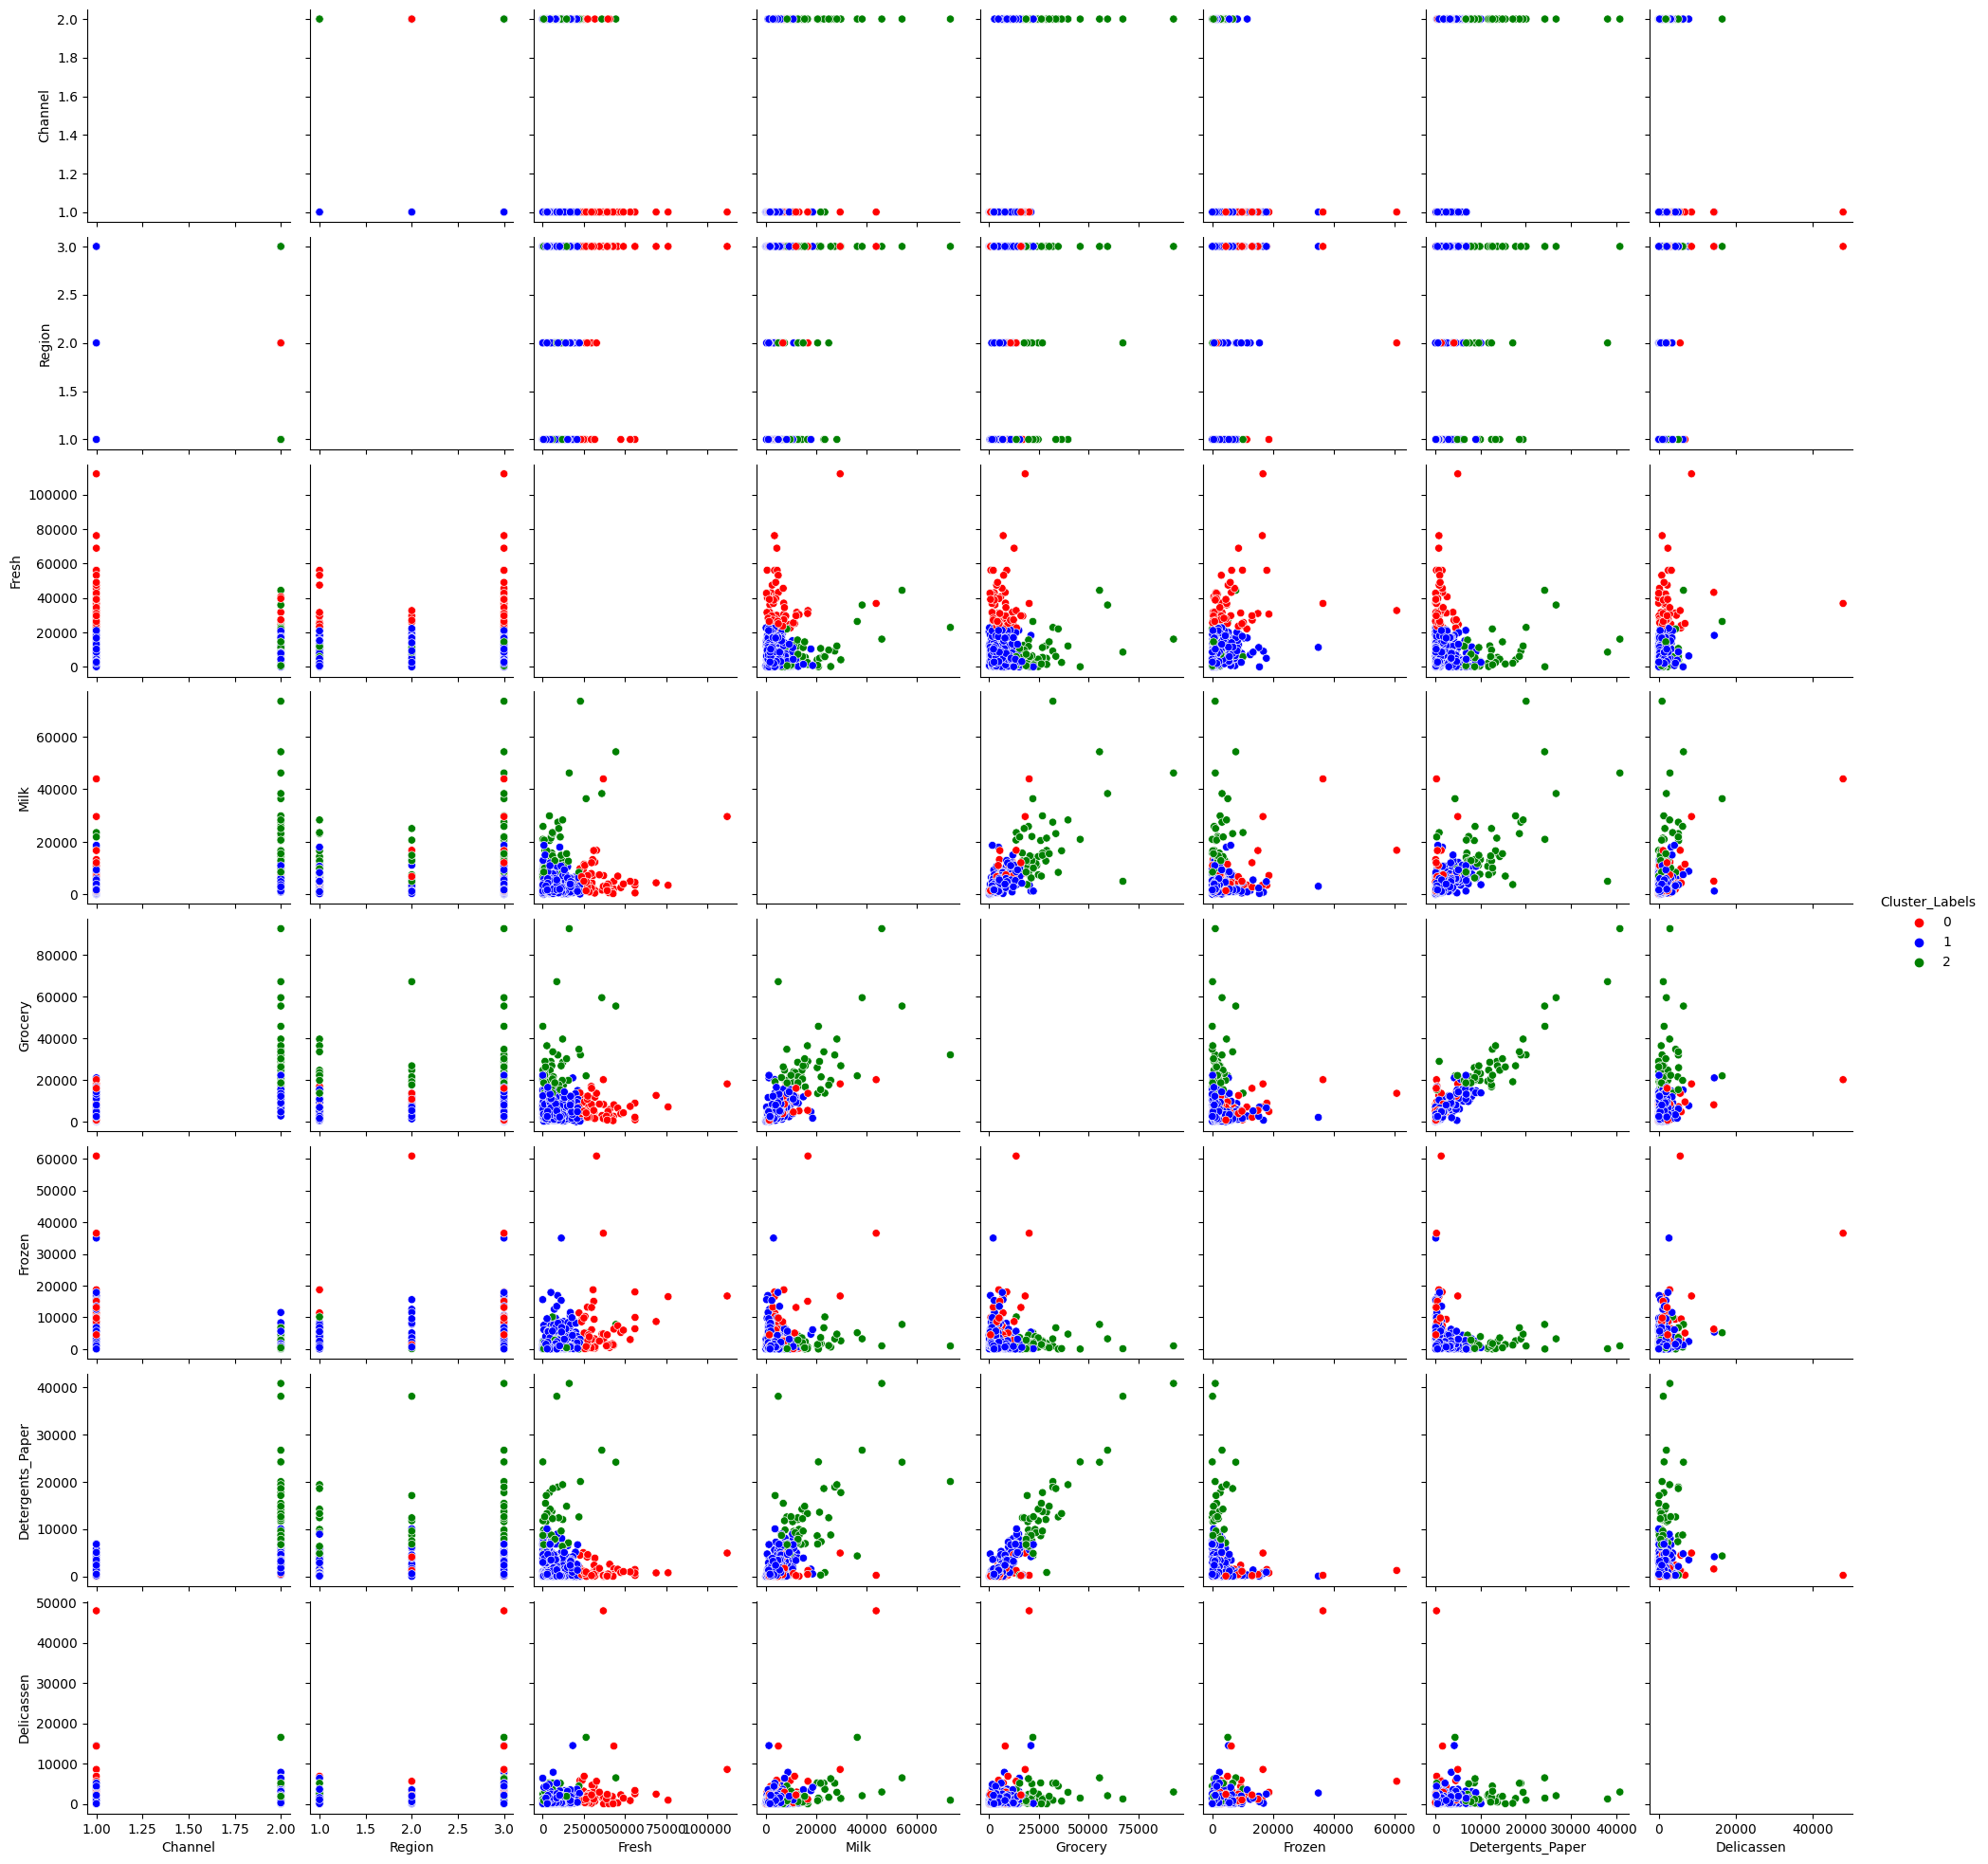

In [34]:
sns.pairplot(df2,kind ='scatter',diag_kind ='None' ,hue ='Cluster_Labels',palette={0:'r',1:'b',2:'g'})

In [35]:
df2['Cluster_Labels'].value_counts()

1    330
0     60
2     50
Name: Cluster_Labels, dtype: int64

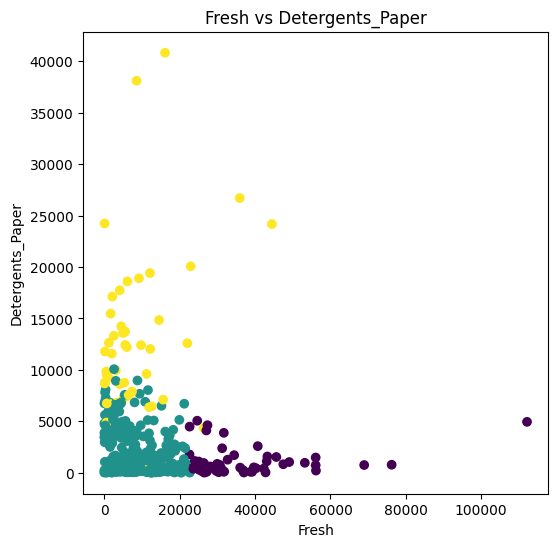

In [110]:
plt.figure(figsize=(6,6))
plt.scatter(data['Fresh'],data['Detergents_Paper'],c = cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.title('Fresh vs Detergents_Paper')
plt.show()

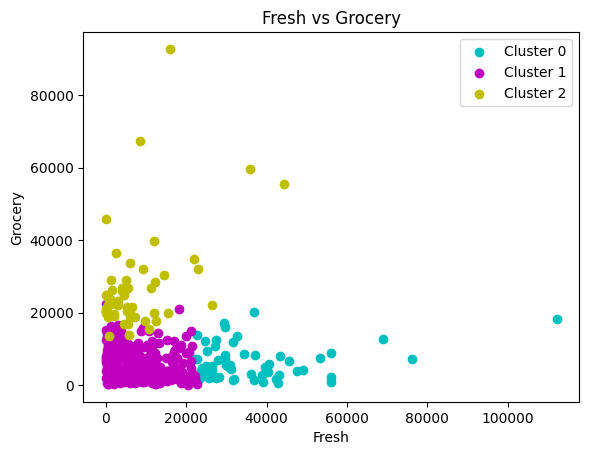

In [37]:
colours = ['c', 'm','y']

for i in range(max(cluster_labels) + 1):
    cluster_data_n = x[cluster_labels == i]
    plt.scatter(cluster_data_n['Fresh'],cluster_data_n['Grocery'], c=colours[i],label=f'Cluster {i}')

plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Fresh vs Grocery')
plt.legend()
plt.show()

In [38]:
df2['Cluster_Labels'].value_counts()

1    330
0     60
2     50
Name: Cluster_Labels, dtype: int64

In [39]:
#Hierarchichal clustering

In [41]:
mergings = linkage(x,method ='ward')

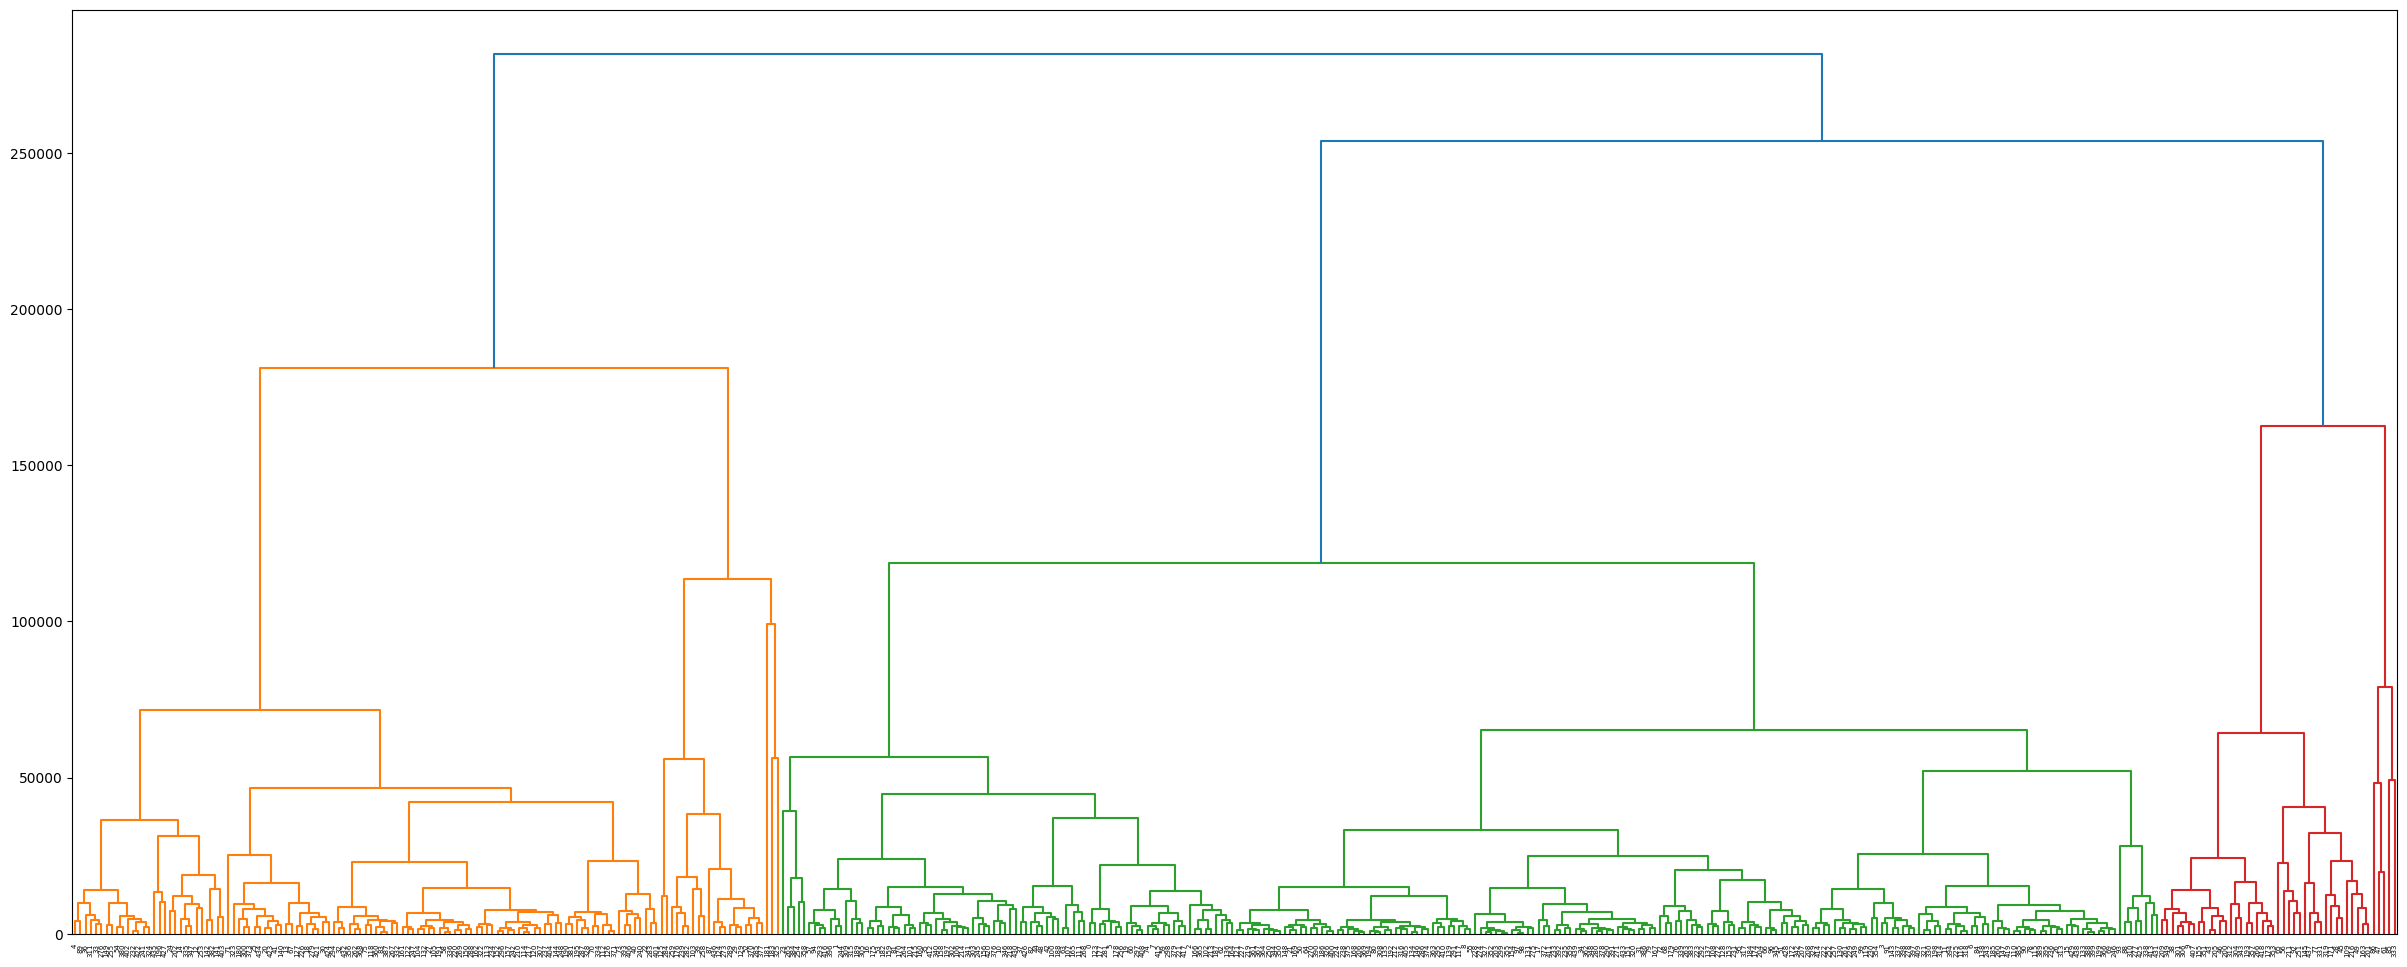

In [42]:
plt.figure(figsize = (30,12))
dendrogram(mergings)
plt.show()

In [43]:
cluster_labels_dend = fcluster(mergings,200000,criterion = 'distance')

In [44]:
df_hc = x.assign(Cluster_Labels=cluster_labels_dend)

In [45]:
df_hc

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  Cluster_Labels  
0          1338               2  
1          1776               2  
2          7844               2  
3          1788               2  
4          5185               1  
..          ...             ...  
435        2204               1  
436        2346               1  
437        1867               3  
438        2125               2  
439          52               2  

[440 rows x 9 columns]

In [46]:
df_hc['Cluster_Labels'].value_counts()

2    261
1    134
3     45
Name: Cluster_Labels, dtype: int64

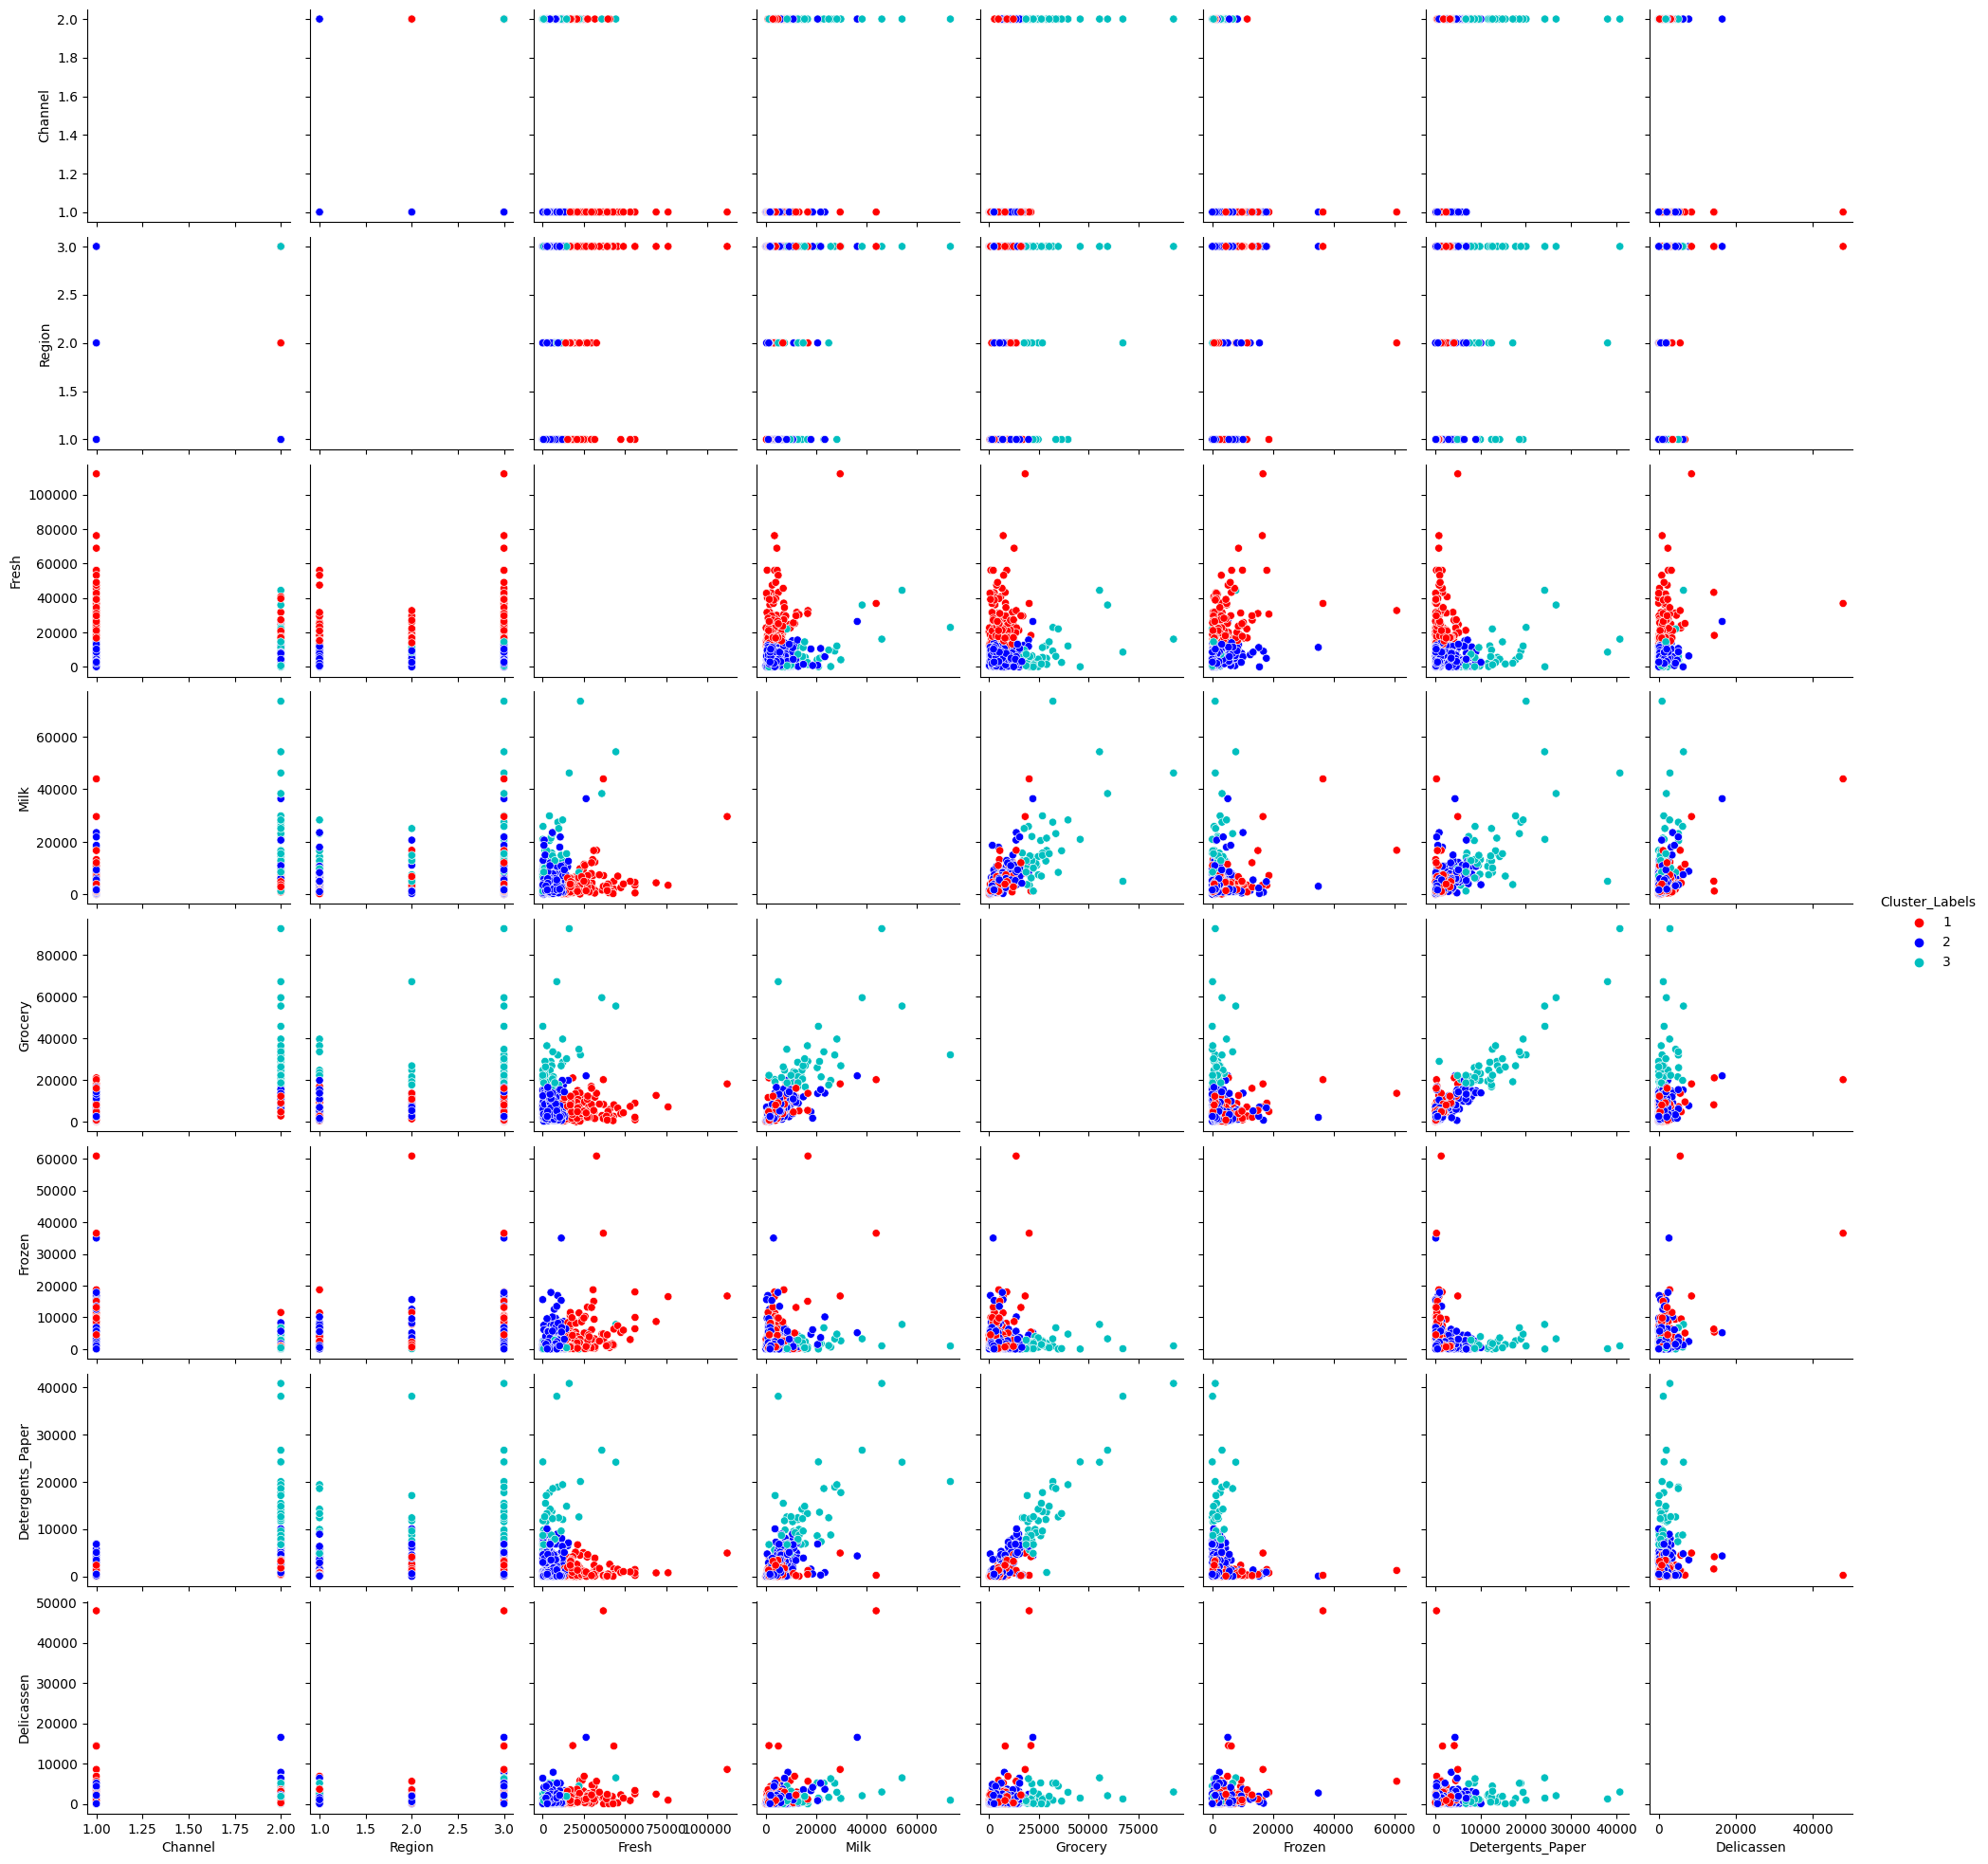

In [47]:
sns.pairplot(df_hc,kind ='scatter',diag_kind ='None' ,hue ='Cluster_Labels',palette={1:'r',2:'b',3:'c'})

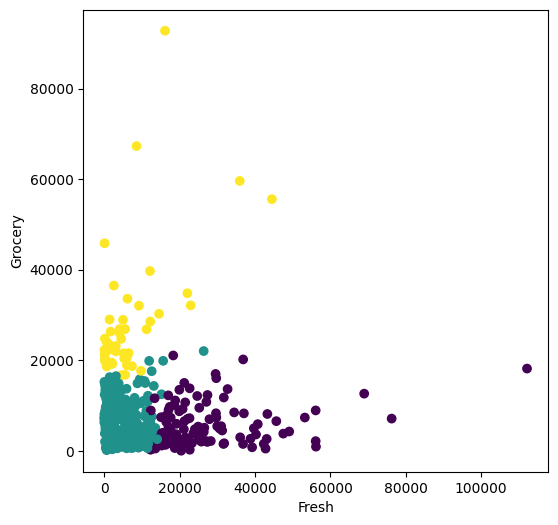

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(data['Fresh'],data['Grocery'],c = cluster_labels_dend)
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

In [49]:
#PCA

In [51]:
x

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [52]:
x_var = pd.DataFrame(scale(x),index=data.index,columns=data.columns)

In [53]:
x_var

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   
..        ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen  
0           -0.043569   -0.066339  
1            0.086407    0.089151  
2            0.133232    2.243293  
3           -0.498588    0.093411  
4           -0.231918    1.299347  
..                ...         ...  
435         -0.566831    0.241091  
436         -0.585519    0.291501  
437          2.511218    0.121456  
438         -0.569770    0.213046  
439         -0.504888   -0.522869  

[440 rows x 8 columns]

In [55]:
pca = PCA()

In [56]:
pc_array = pca.fit_transform(x_var)

In [57]:
pc_array.shape

(440, 8)

In [58]:
data_PCA = pd.DataFrame(pc_array,columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

In [59]:
data_PCA

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    0.843939 -0.515351 -0.767632 -0.044215 -0.446234 -0.939441  0.654762   
1    1.062676 -0.484601 -0.672975  0.401372 -0.130458 -0.867227  0.511022   
2    1.269141  0.682055 -0.664095  1.634953 -1.193813 -1.078442 -0.203152   
3   -1.056782  0.610821 -0.505654  0.196005  0.457855  0.116959 -0.313804   
4    0.634030  0.974199 -0.771209  0.186374 -0.813877 -1.505372 -0.160399   
..        ...       ...       ...       ...       ...       ...       ...   
435  0.222884  2.480505 -0.360936 -0.601036  1.109212  0.364851  0.346184   
436 -1.290172  1.560397 -0.756171 -1.342401 -0.533462 -0.205789 -0.242280   
437  3.865149 -0.479854 -0.525345 -0.687132  0.108968  0.280320 -0.575297   
438 -1.097067 -0.069896 -0.630128  0.311821 -0.424792  0.335170 -0.153744   
439 -1.165951 -0.902157 -0.597705  0.342656 -0.004388  0.508721  0.024360   

          pc8  
0    0.018102  
1    0.077895  
2   -0.254037  
3    0.054377  
4    0.003763  
..        ...  
435  0.860980  
436 -0.226984  
437 -0.089003  
438 -0.037308  
439  0.018668  

[440 rows x 8 columns]

In [60]:
data_PCA.corr().round()

pc1  pc2  pc3  pc4  pc5  pc6  pc7  pc8
pc1  1.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0
pc2 -0.0  1.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0
pc3  0.0 -0.0  1.0 -0.0  0.0 -0.0  0.0  0.0
pc4  0.0  0.0 -0.0  1.0  0.0 -0.0 -0.0 -0.0
pc5 -0.0 -0.0  0.0  0.0  1.0 -0.0  0.0  0.0
pc6 -0.0  0.0 -0.0 -0.0 -0.0  1.0 -0.0  0.0
pc7 -0.0 -0.0  0.0 -0.0  0.0 -0.0  1.0 -0.0
pc8  0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0  1.0

In [61]:
pca.explained_variance_

array([3.10707136, 1.79404441, 1.0140786 , 0.74007428, 0.55790035,
       0.46035462, 0.28176643, 0.06293318])

In [62]:
pca.explained_variance_ratio_ * 100

array([38.75012291, 22.37458795, 12.64717345,  9.22990372,  6.95790497,
        5.74135444,  3.51407568,  0.78487688])

In [63]:
38.75012291 + 22.37458795 + 12.64717345 + 9.22990372 + 6.95790497 + 5.74135444

95.70104744

In [64]:
pca1 = PCA(n_components=6)

In [65]:
PCArray = pca1.fit_transform(x_var)

In [66]:
data_PCA_fin = pd.DataFrame(PCArray,columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])

In [67]:
data_PCA_fin.corr().round()

pc1  pc2  pc3  pc4  pc5  pc6
pc1  1.0 -0.0  0.0  0.0 -0.0 -0.0
pc2 -0.0  1.0 -0.0  0.0 -0.0  0.0
pc3  0.0 -0.0  1.0 -0.0  0.0 -0.0
pc4  0.0  0.0 -0.0  1.0  0.0 -0.0
pc5 -0.0 -0.0  0.0  0.0  1.0 -0.0
pc6 -0.0  0.0 -0.0 -0.0 -0.0  1.0

In [68]:
pca1.explained_variance_

array([3.10707136, 1.79404441, 1.0140786 , 0.74007428, 0.55790035,
       0.46035462])

In [69]:
pca1.explained_variance_ratio_ * 100

array([38.75012291, 22.37458795, 12.64717345,  9.22990372,  6.95790497,
        5.74135444])

In [70]:
38.75012291+22.37458795+12.64717345+ 9.22990372+  6.95790497+5.74135444

95.70104744

In [71]:
#clustering using kmeans in PCA dataset

In [72]:
wcss_pca = []
n_clusters = np.arange(1,21)
for i in n_clusters:
  km = KMeans(init ='k-means++',n_clusters=i,n_init=20)
  km.fit(data_PCA_fin)
  css1 = km.inertia_
  wcss_pca.append(css1)


[]

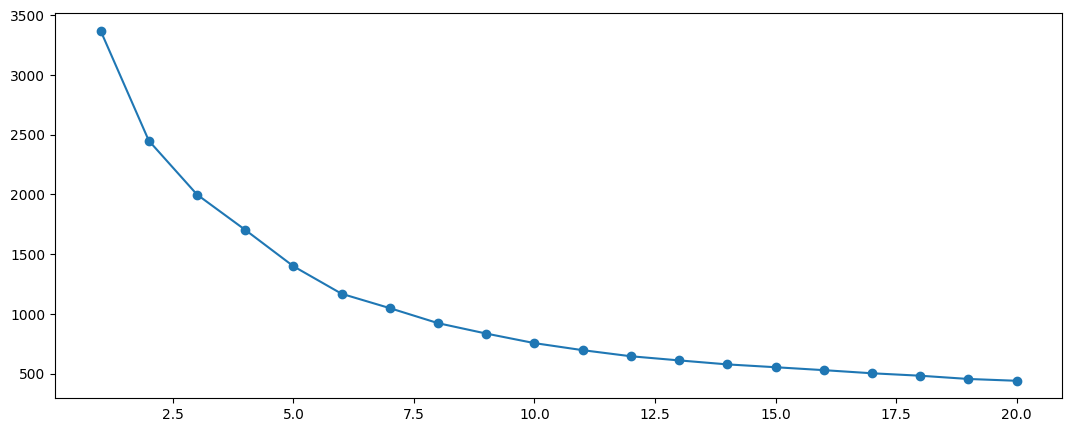

In [73]:
plt.figure(figsize = (13,5))
plt.plot(n_clusters,wcss_pca,'o-')
plt.plot()

In [74]:
wcss_pca

[3368.6768698806645,
 2448.3551255594057,
 1997.7979626214162,
 1702.255592249172,
 1397.7122595156166,
 1167.4854077866657,
 1047.3217589615006,
 921.6038860291178,
 834.5496892237152,
 754.5954789893813,
 695.6976813402434,
 644.6700506237562,
 610.1273988426046,
 576.6666088222642,
 552.9282362114541,
 528.5315584394855,
 502.3554901131813,
 481.8535145034609,
 454.69422548998216,
 439.53334552644924]

In [75]:
#3 is the optimum no of clusters by elbow method

In [76]:
#silhouette score

In [77]:
silhouette_scr_pca = []
k_clusters = np.arange(2,21)
for i in k_clusters:
  km = KMeans(init ='k-means++', n_clusters=i,n_init=20)
  km.fit(data_PCA_fin)
  clst_lbl_sh_pca = km.predict(data_PCA_fin)
  sh_sc_pca = silhouette_score(data_PCA_fin ,clst_lbl_sh_pca)
  silhouette_scr_pca.append(sh_sc_pca)

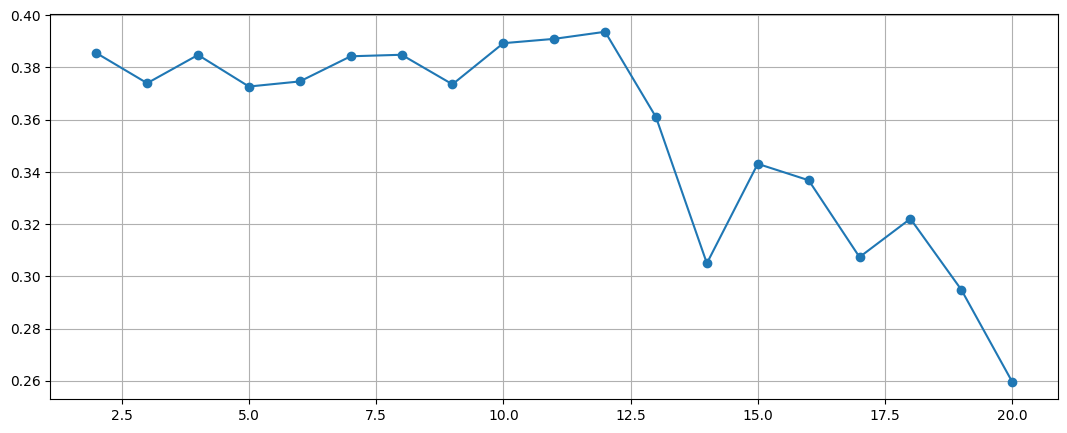

In [78]:
plt.figure(figsize=(13,5))
plt.plot(k_clusters,silhouette_scr_pca,'o-')
plt.grid()

In [111]:
'''3 and 6 have almost same score
thus the  value common in both silhouette and elbow method '3' is chosen '''

"3 and 6 have almost same score\nthus the  value common in both silhouette and elbow method '3' is chosen "

In [80]:
#kmeans with no of clusters = 3

In [81]:
km = KMeans(init ='k-means++',n_clusters=3,n_init=20)
km.fit(data_PCA_fin)

KMeans(n_clusters=3, n_init=20)

In [82]:
clust_lbl_pca_km = km.predict(data_PCA_fin)

In [83]:
pd.Series(clust_lbl_pca_km).value_counts()

1    296
0    130
2     14
dtype: int64

In [84]:
df_pca_km = data_PCA_fin.assign(clusterlabel_km = clust_lbl_pca_km)

In [85]:
df_pca_km

pc1       pc2       pc3       pc4       pc5       pc6  \
0    0.843939 -0.515351 -0.767632 -0.044215 -0.446234 -0.939441   
1    1.062676 -0.484601 -0.672975  0.401372 -0.130458 -0.867227   
2    1.269141  0.682055 -0.664095  1.634953 -1.193813 -1.078442   
3   -1.056782  0.610821 -0.505654  0.196005  0.457855  0.116959   
4    0.634030  0.974199 -0.771209  0.186374 -0.813877 -1.505372   
..        ...       ...       ...       ...       ...       ...   
435  0.222884  2.480505 -0.360936 -0.601036  1.109212  0.364851   
436 -1.290172  1.560397 -0.756171 -1.342401 -0.533462 -0.205789   
437  3.865149 -0.479854 -0.525345 -0.687132  0.108968  0.280320   
438 -1.097067 -0.069896 -0.630128  0.311821 -0.424792  0.335170   
439 -1.165951 -0.902157 -0.597705  0.342656 -0.004388  0.508721   

     clusterlabel_km  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  
..               ...  
435                1  
436                1  
437                0  
438                1  
439                1  

[440 rows x 7 columns]

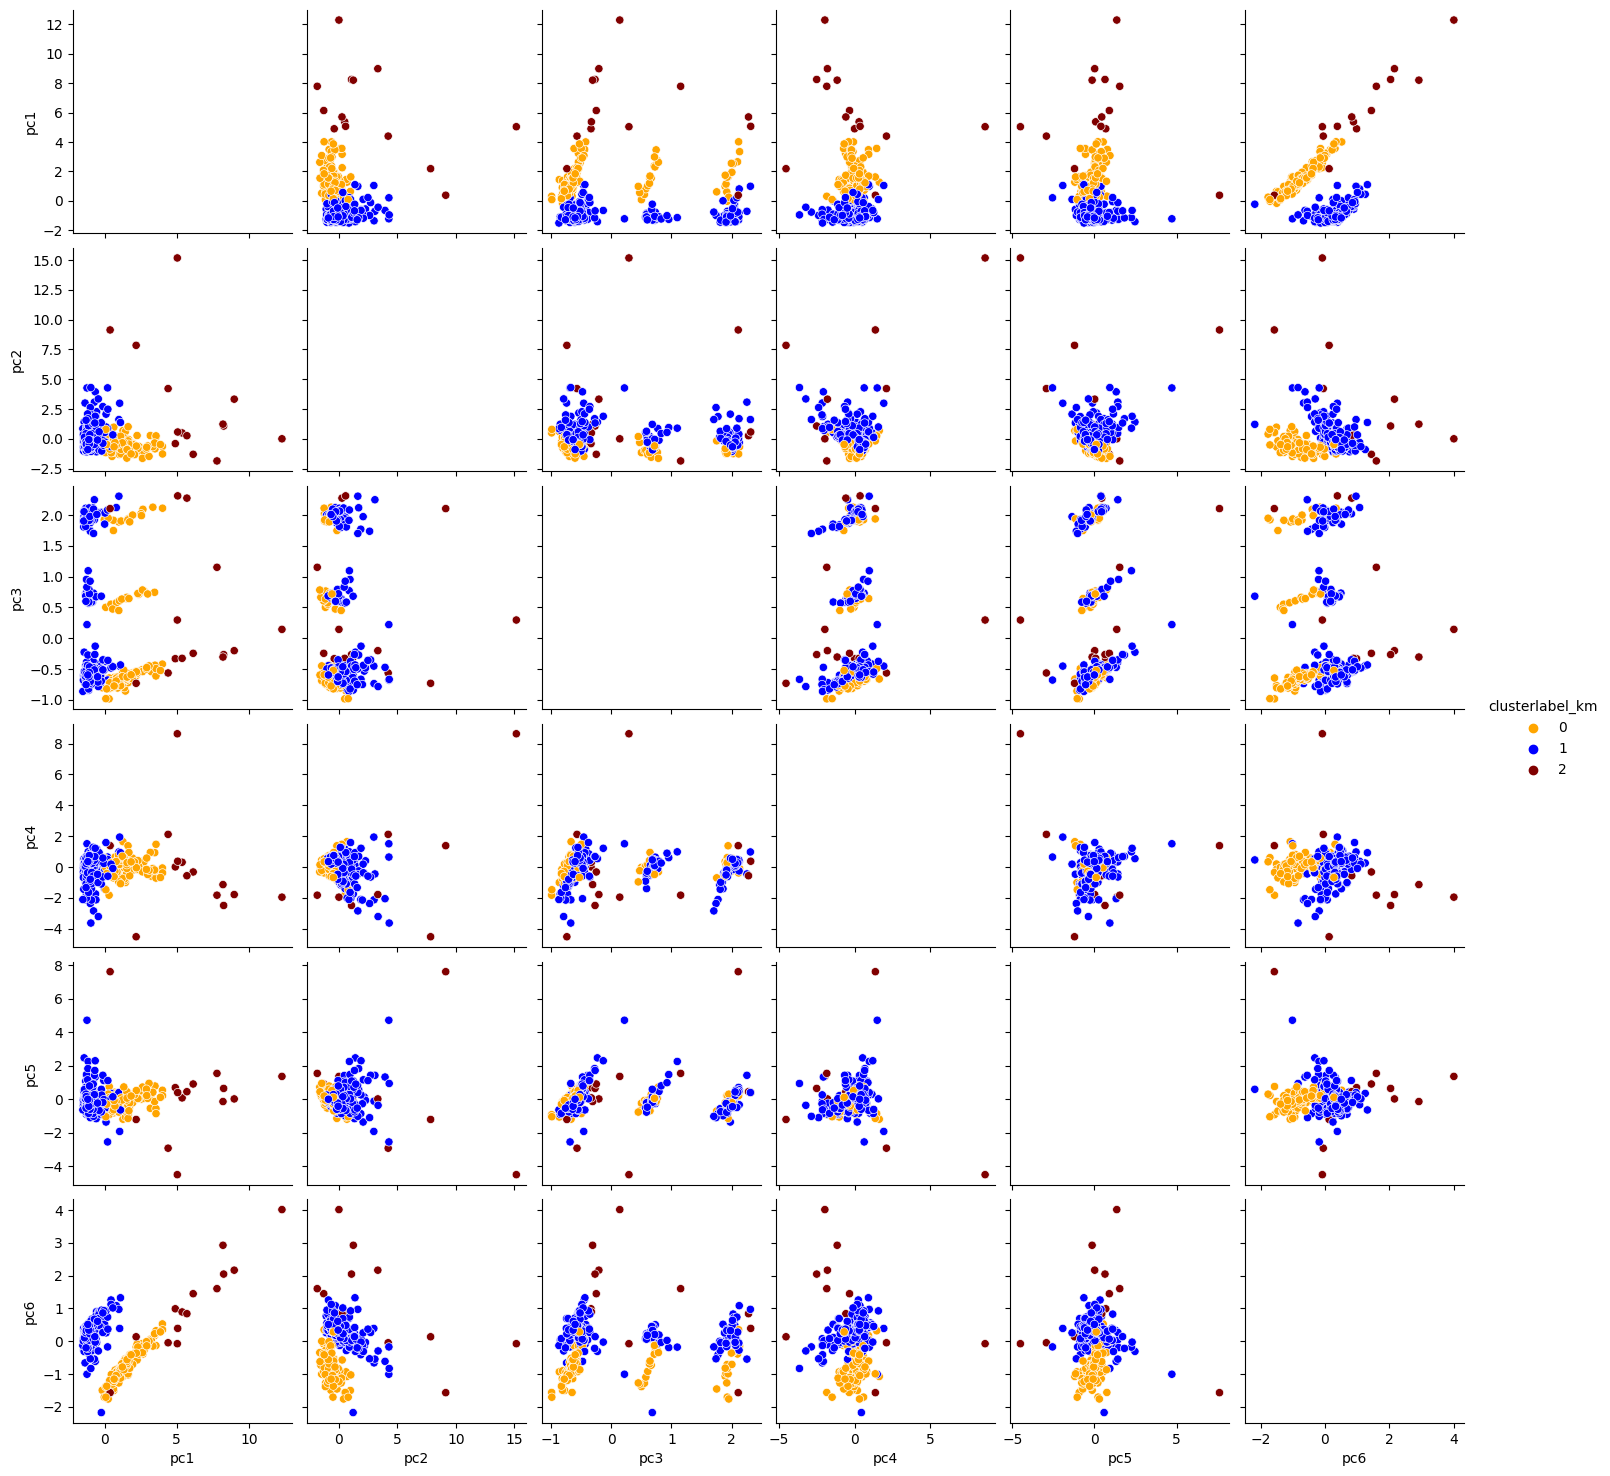

In [86]:
sns.pairplot(df_pca_km,kind='scatter',diag_kind='None',hue='clusterlabel_km',palette={0:'orange',1:'blue',2:'maroon'})

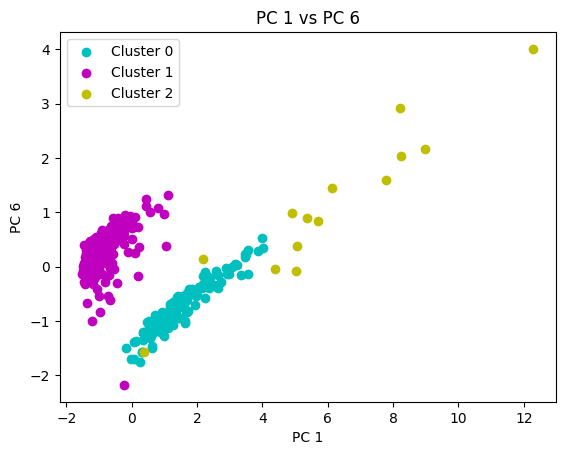

In [87]:
colors = ['c', 'm','y']

for i in range(max(clust_lbl_pca_km) + 1):
    cluster_data = data_PCA_fin[clust_lbl_pca_km == i]
    plt.scatter(cluster_data['pc1'],cluster_data['pc6'], c=colors[i],label=f'Cluster {i}')

plt.xlabel('PC 1')
plt.ylabel('PC 6')
plt.title('PC 1 vs PC 6')

plt.legend()

plt.show()

In [88]:
#adding pca-classified entries to data points in original data and plotting

In [89]:
data_class_PCAkm = x.assign(clusterlabel_km = clust_lbl_pca_km)

In [90]:
data_class_PCAkm.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  clusterlabel_km  
0        1338                0  
1        1776                0  
2        7844                0  
3        1788                1  
4        5185                0

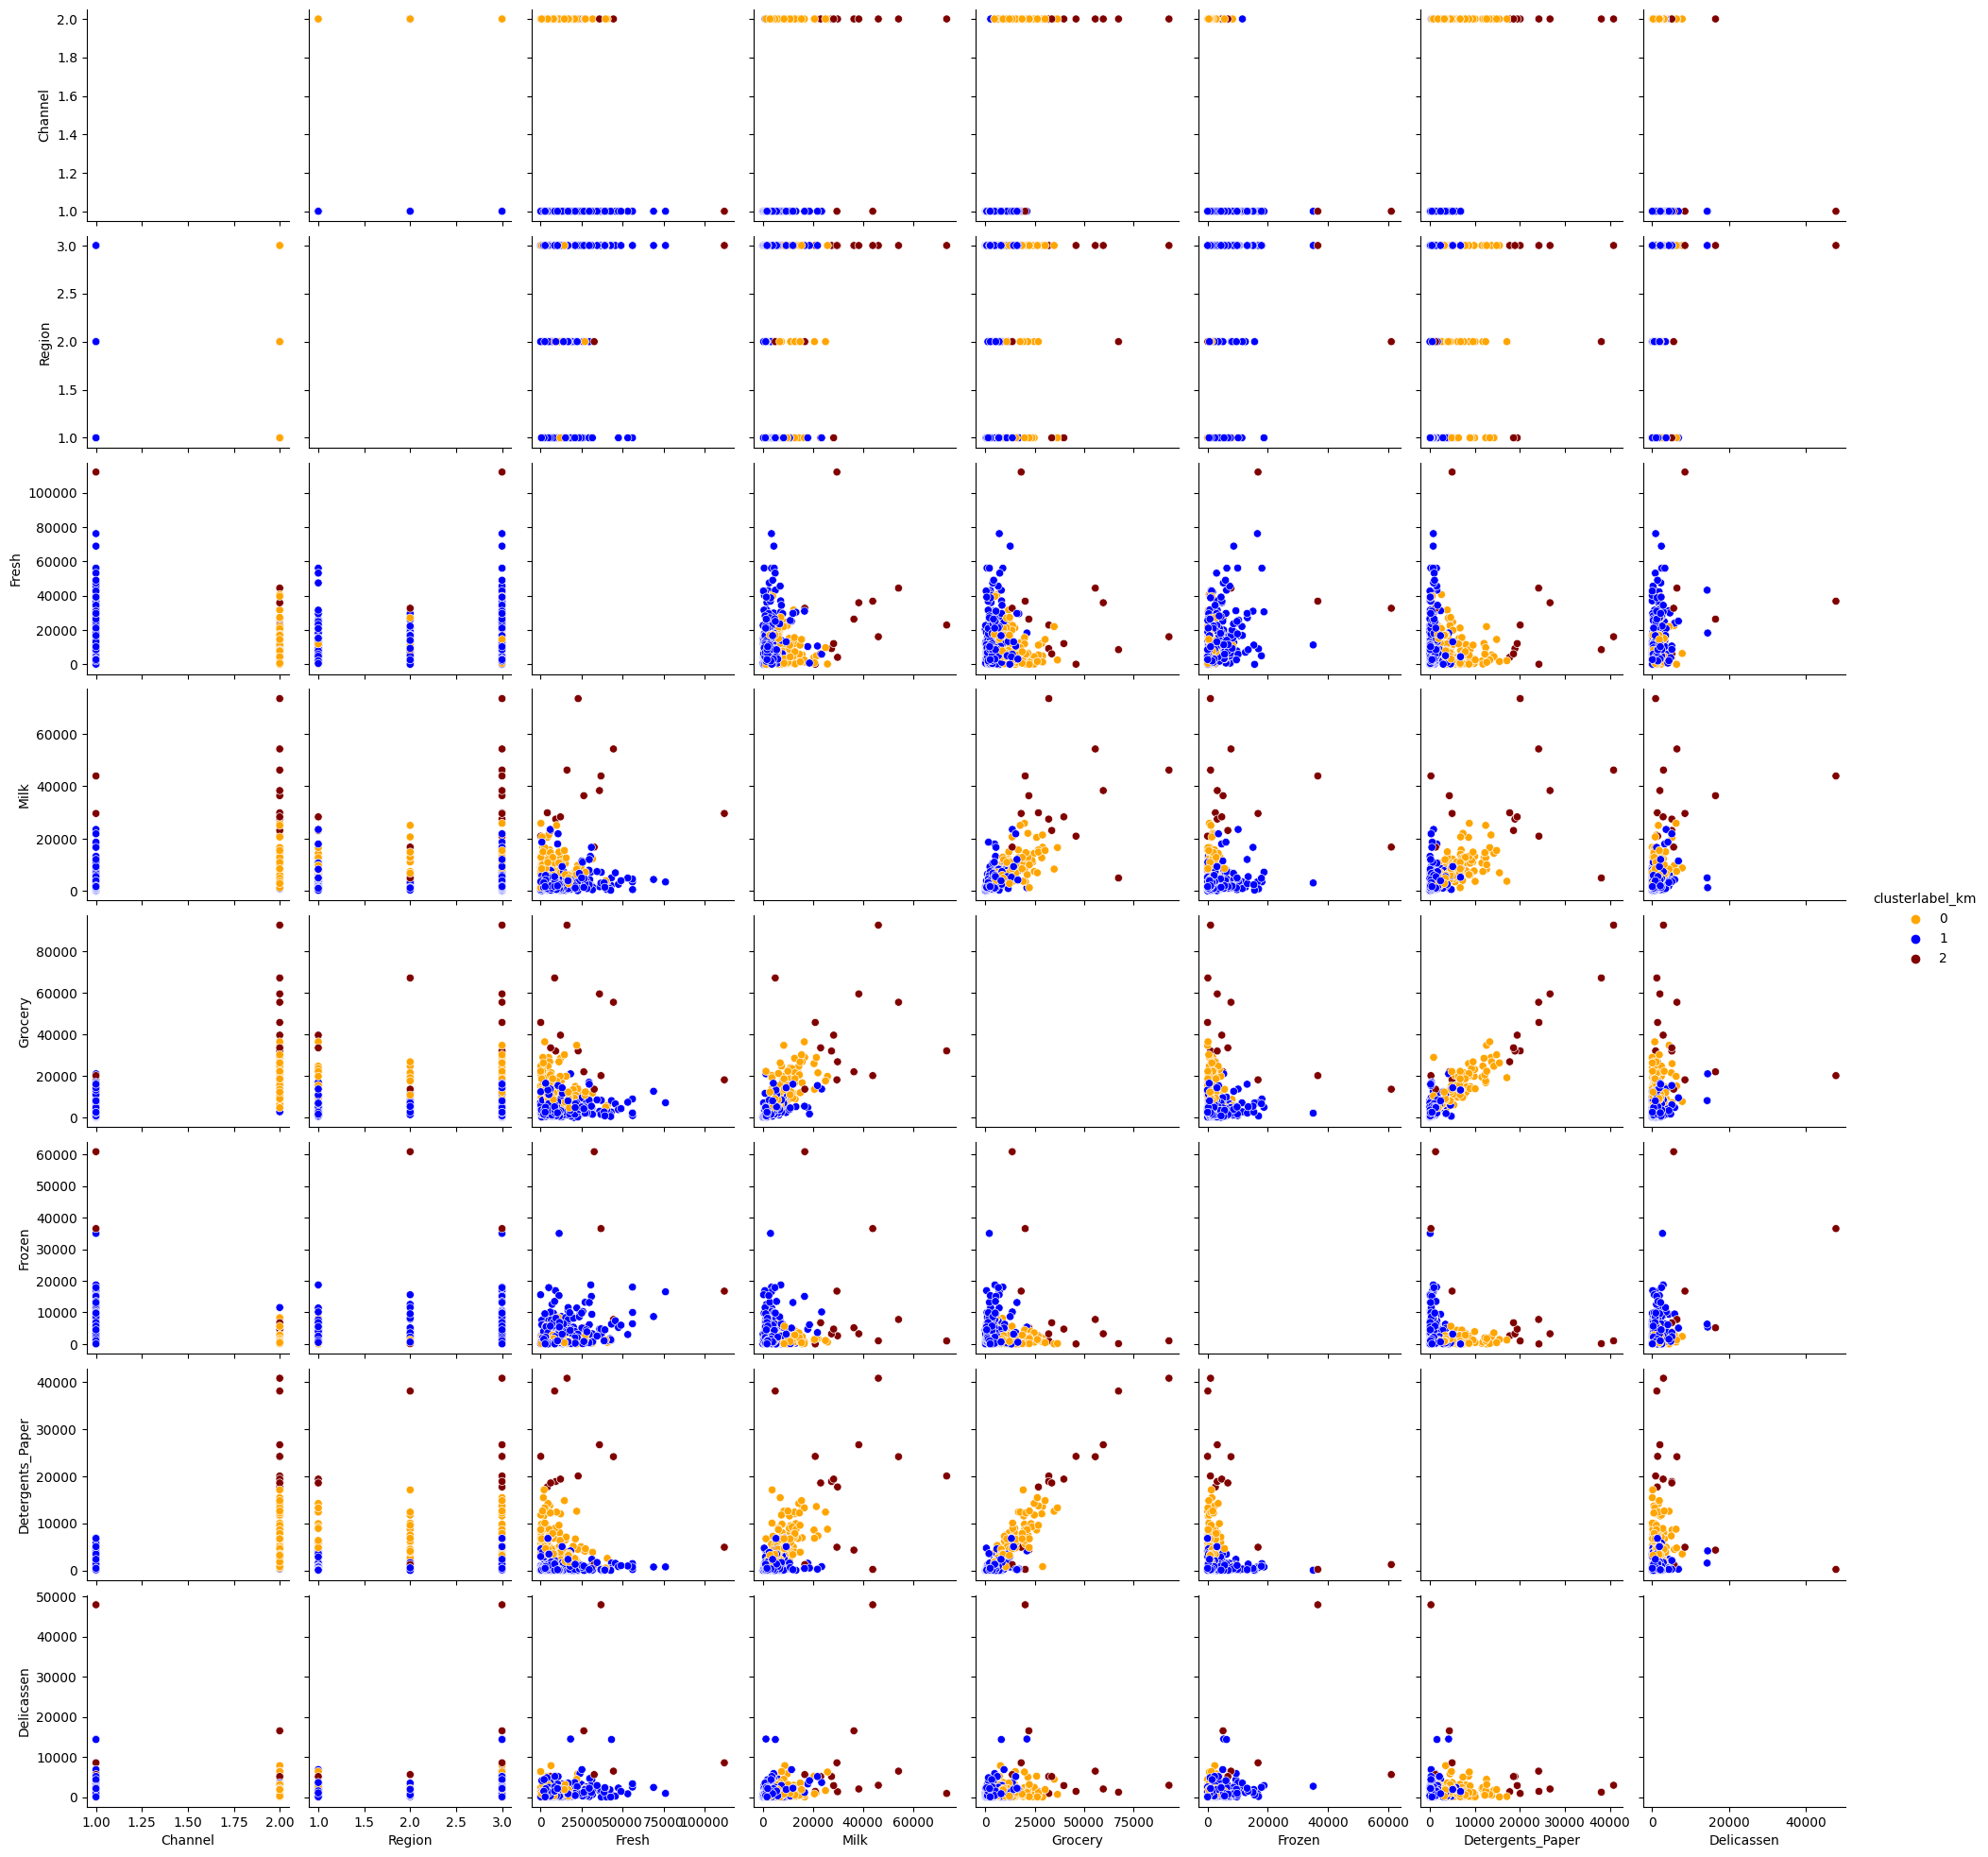

In [91]:
sns.pairplot(data_class_PCAkm,kind='scatter',diag_kind='None',hue='clusterlabel_km',palette={0:'orange',1:'blue',2:'maroon'})

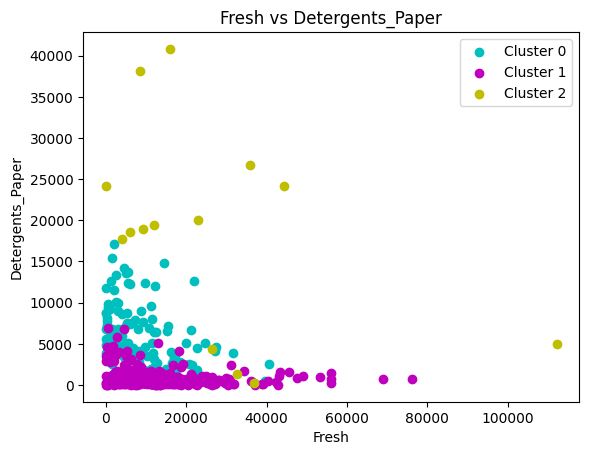

In [92]:
colors = ['c', 'm','y']

for i in range(max(clust_lbl_pca_km) + 1):
    cluster_data = data_class_PCAkm[clust_lbl_pca_km == i]
    plt.scatter(cluster_data['Fresh'],cluster_data['Detergents_Paper'], c=colors[i],label=f'Cluster {i}')

plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.title('Fresh vs Detergents_Paper')

plt.legend()

plt.show()

In [93]:
pd.Series(clust_lbl_pca_km).value_counts()

1    296
0    130
2     14
dtype: int64

In [94]:
#PCA with Hierarchical clustering

In [95]:
mergings_hc = linkage(data_PCA_fin, method = 'ward')

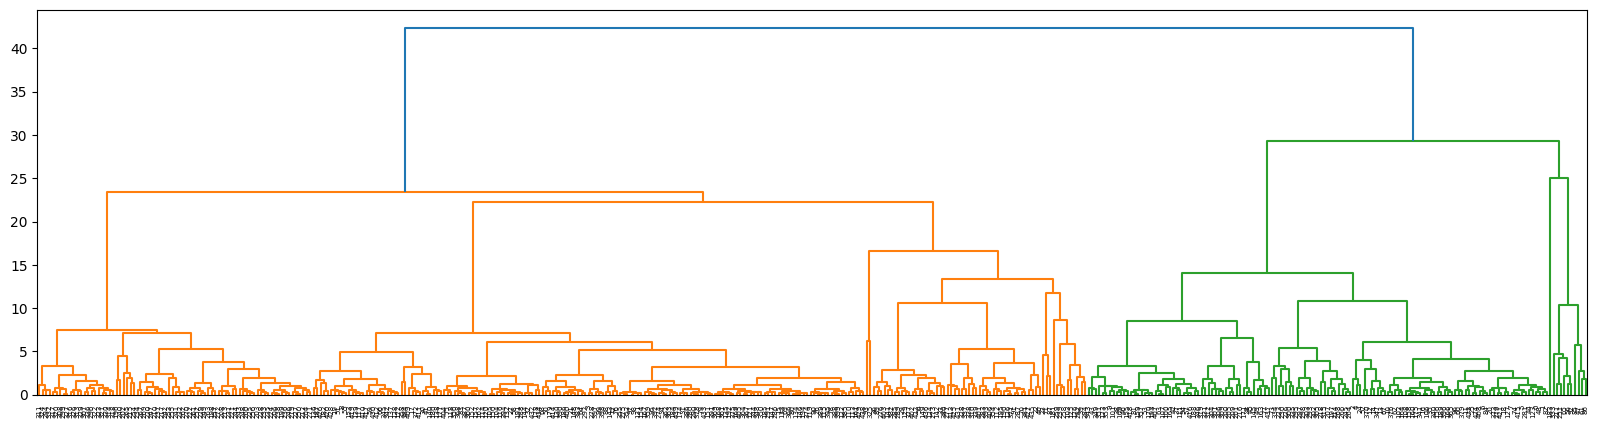

In [96]:
plt.figure(figsize=(20,5))
dendrogram(mergings_hc)
plt.show()

In [97]:
clst_lbl_pca_hc = fcluster(mergings_hc,35,criterion='distance')

In [98]:
df_pca_hc = data_PCA_fin.assign(cluster_label_hc=clst_lbl_pca_hc)

In [99]:
df_pca_hc

pc1       pc2       pc3       pc4       pc5       pc6  \
0    0.843939 -0.515351 -0.767632 -0.044215 -0.446234 -0.939441   
1    1.062676 -0.484601 -0.672975  0.401372 -0.130458 -0.867227   
2    1.269141  0.682055 -0.664095  1.634953 -1.193813 -1.078442   
3   -1.056782  0.610821 -0.505654  0.196005  0.457855  0.116959   
4    0.634030  0.974199 -0.771209  0.186374 -0.813877 -1.505372   
..        ...       ...       ...       ...       ...       ...   
435  0.222884  2.480505 -0.360936 -0.601036  1.109212  0.364851   
436 -1.290172  1.560397 -0.756171 -1.342401 -0.533462 -0.205789   
437  3.865149 -0.479854 -0.525345 -0.687132  0.108968  0.280320   
438 -1.097067 -0.069896 -0.630128  0.311821 -0.424792  0.335170   
439 -1.165951 -0.902157 -0.597705  0.342656 -0.004388  0.508721   

     cluster_label_hc  
0                   2  
1                   2  
2                   2  
3                   1  
4                   2  
..                ...  
435                 1  
436                 1  
437                 2  
438                 1  
439                 1  

[440 rows x 7 columns]

In [100]:
df_pca_hc['cluster_label_hc'].value_counts()

1    298
2    142
Name: cluster_label_hc, dtype: int64

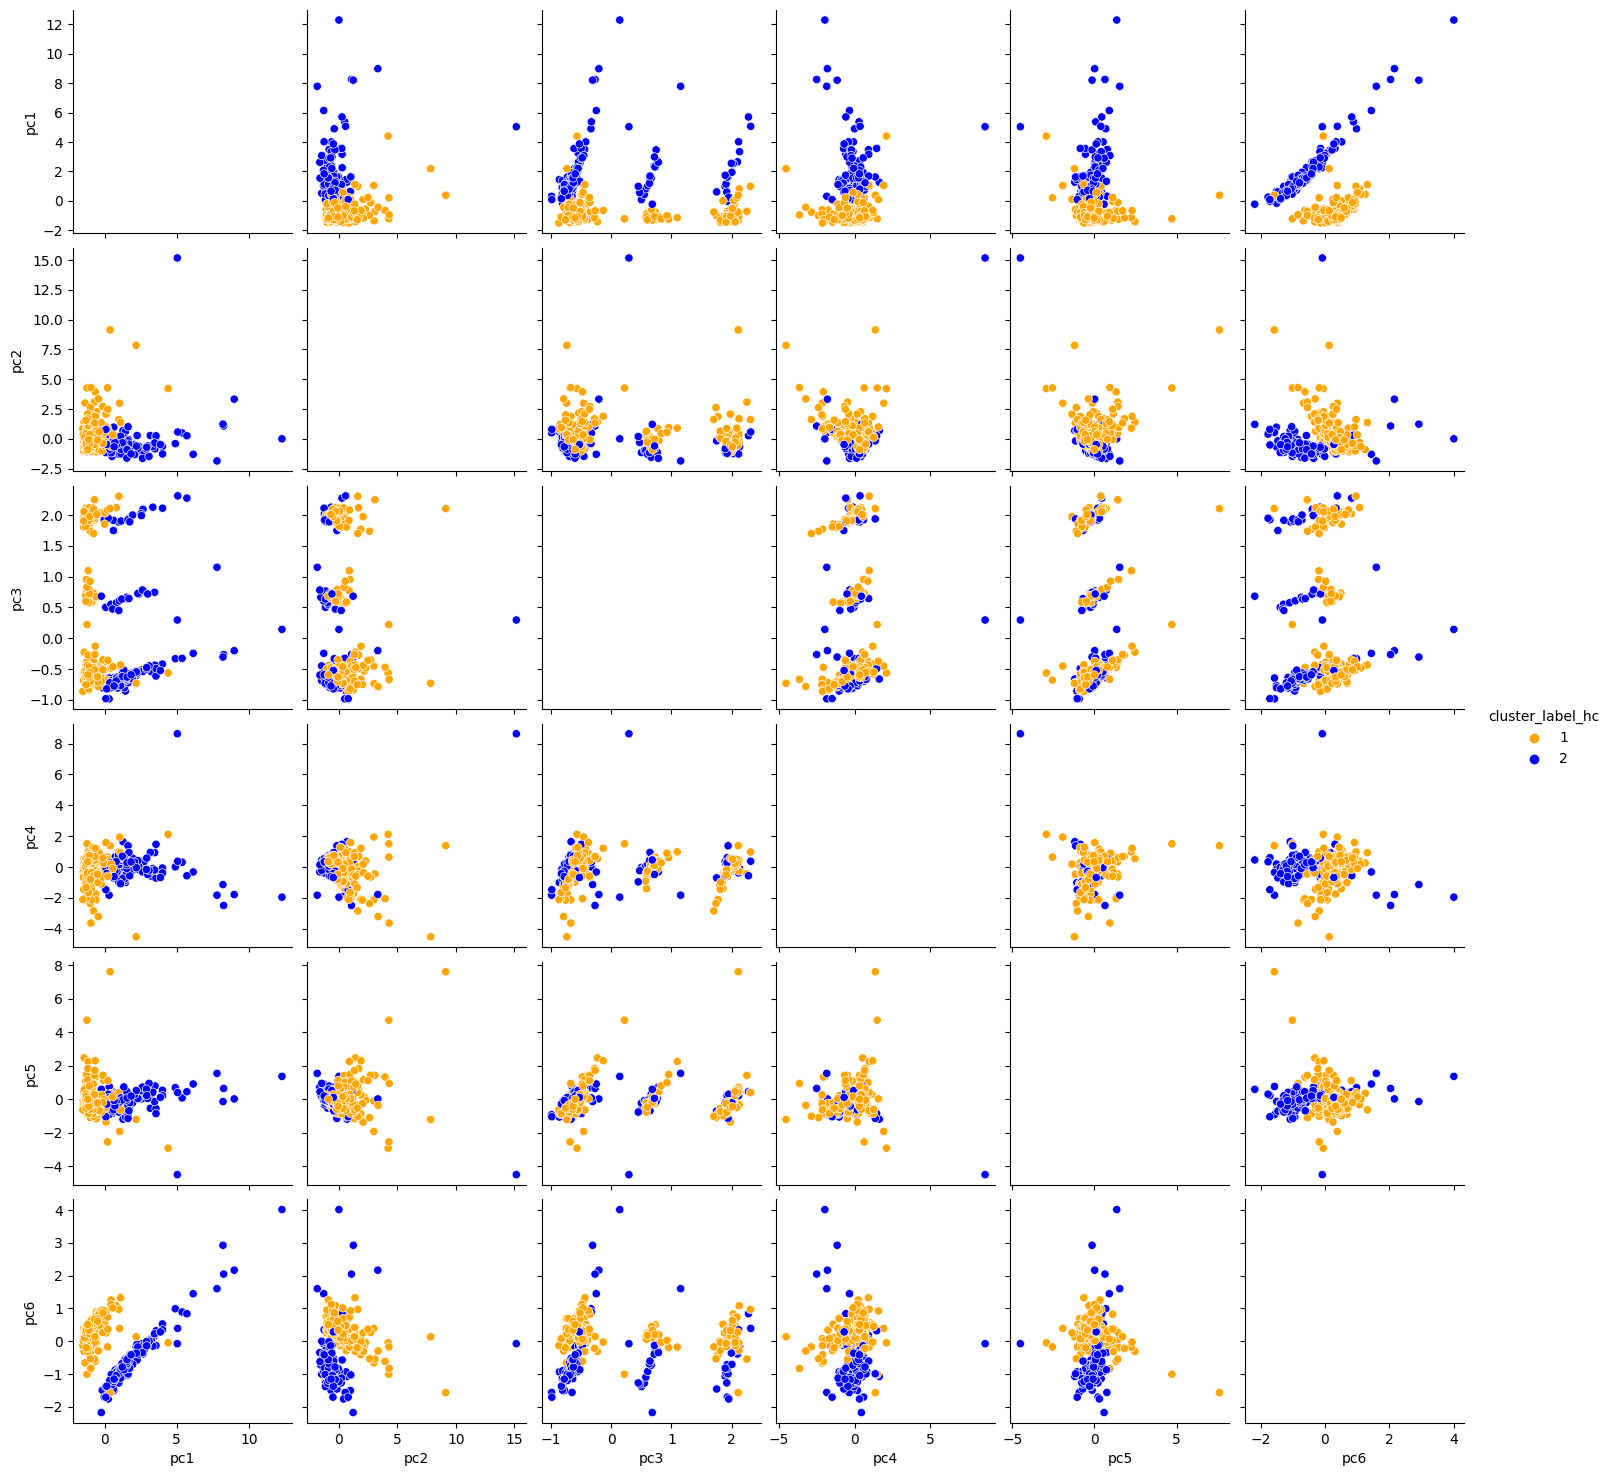

In [101]:
sns.pairplot(df_pca_hc,kind='scatter',diag_kind='None',hue='cluster_label_hc',palette={1:'orange',2:'blue'})

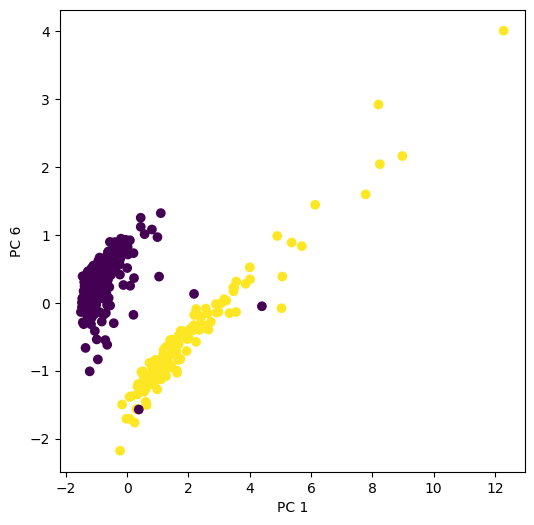

In [102]:
plt.figure(figsize=(6,6))
plt.scatter(data_PCA_fin['pc1'],data_PCA_fin['pc6'],c = clst_lbl_pca_hc)
plt.xlabel('PC 1')
plt.ylabel('PC 6')
plt.show()

In [103]:
#adding cluster labels to original dataset and plotting

In [104]:
data_class_PCA_hc = x.assign(cluster_label_hc=clst_lbl_pca_hc)

In [105]:
data_class_PCA_hc.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  cluster_label_hc  
0        1338                 2  
1        1776                 2  
2        7844                 2  
3        1788                 1  
4        5185                 2

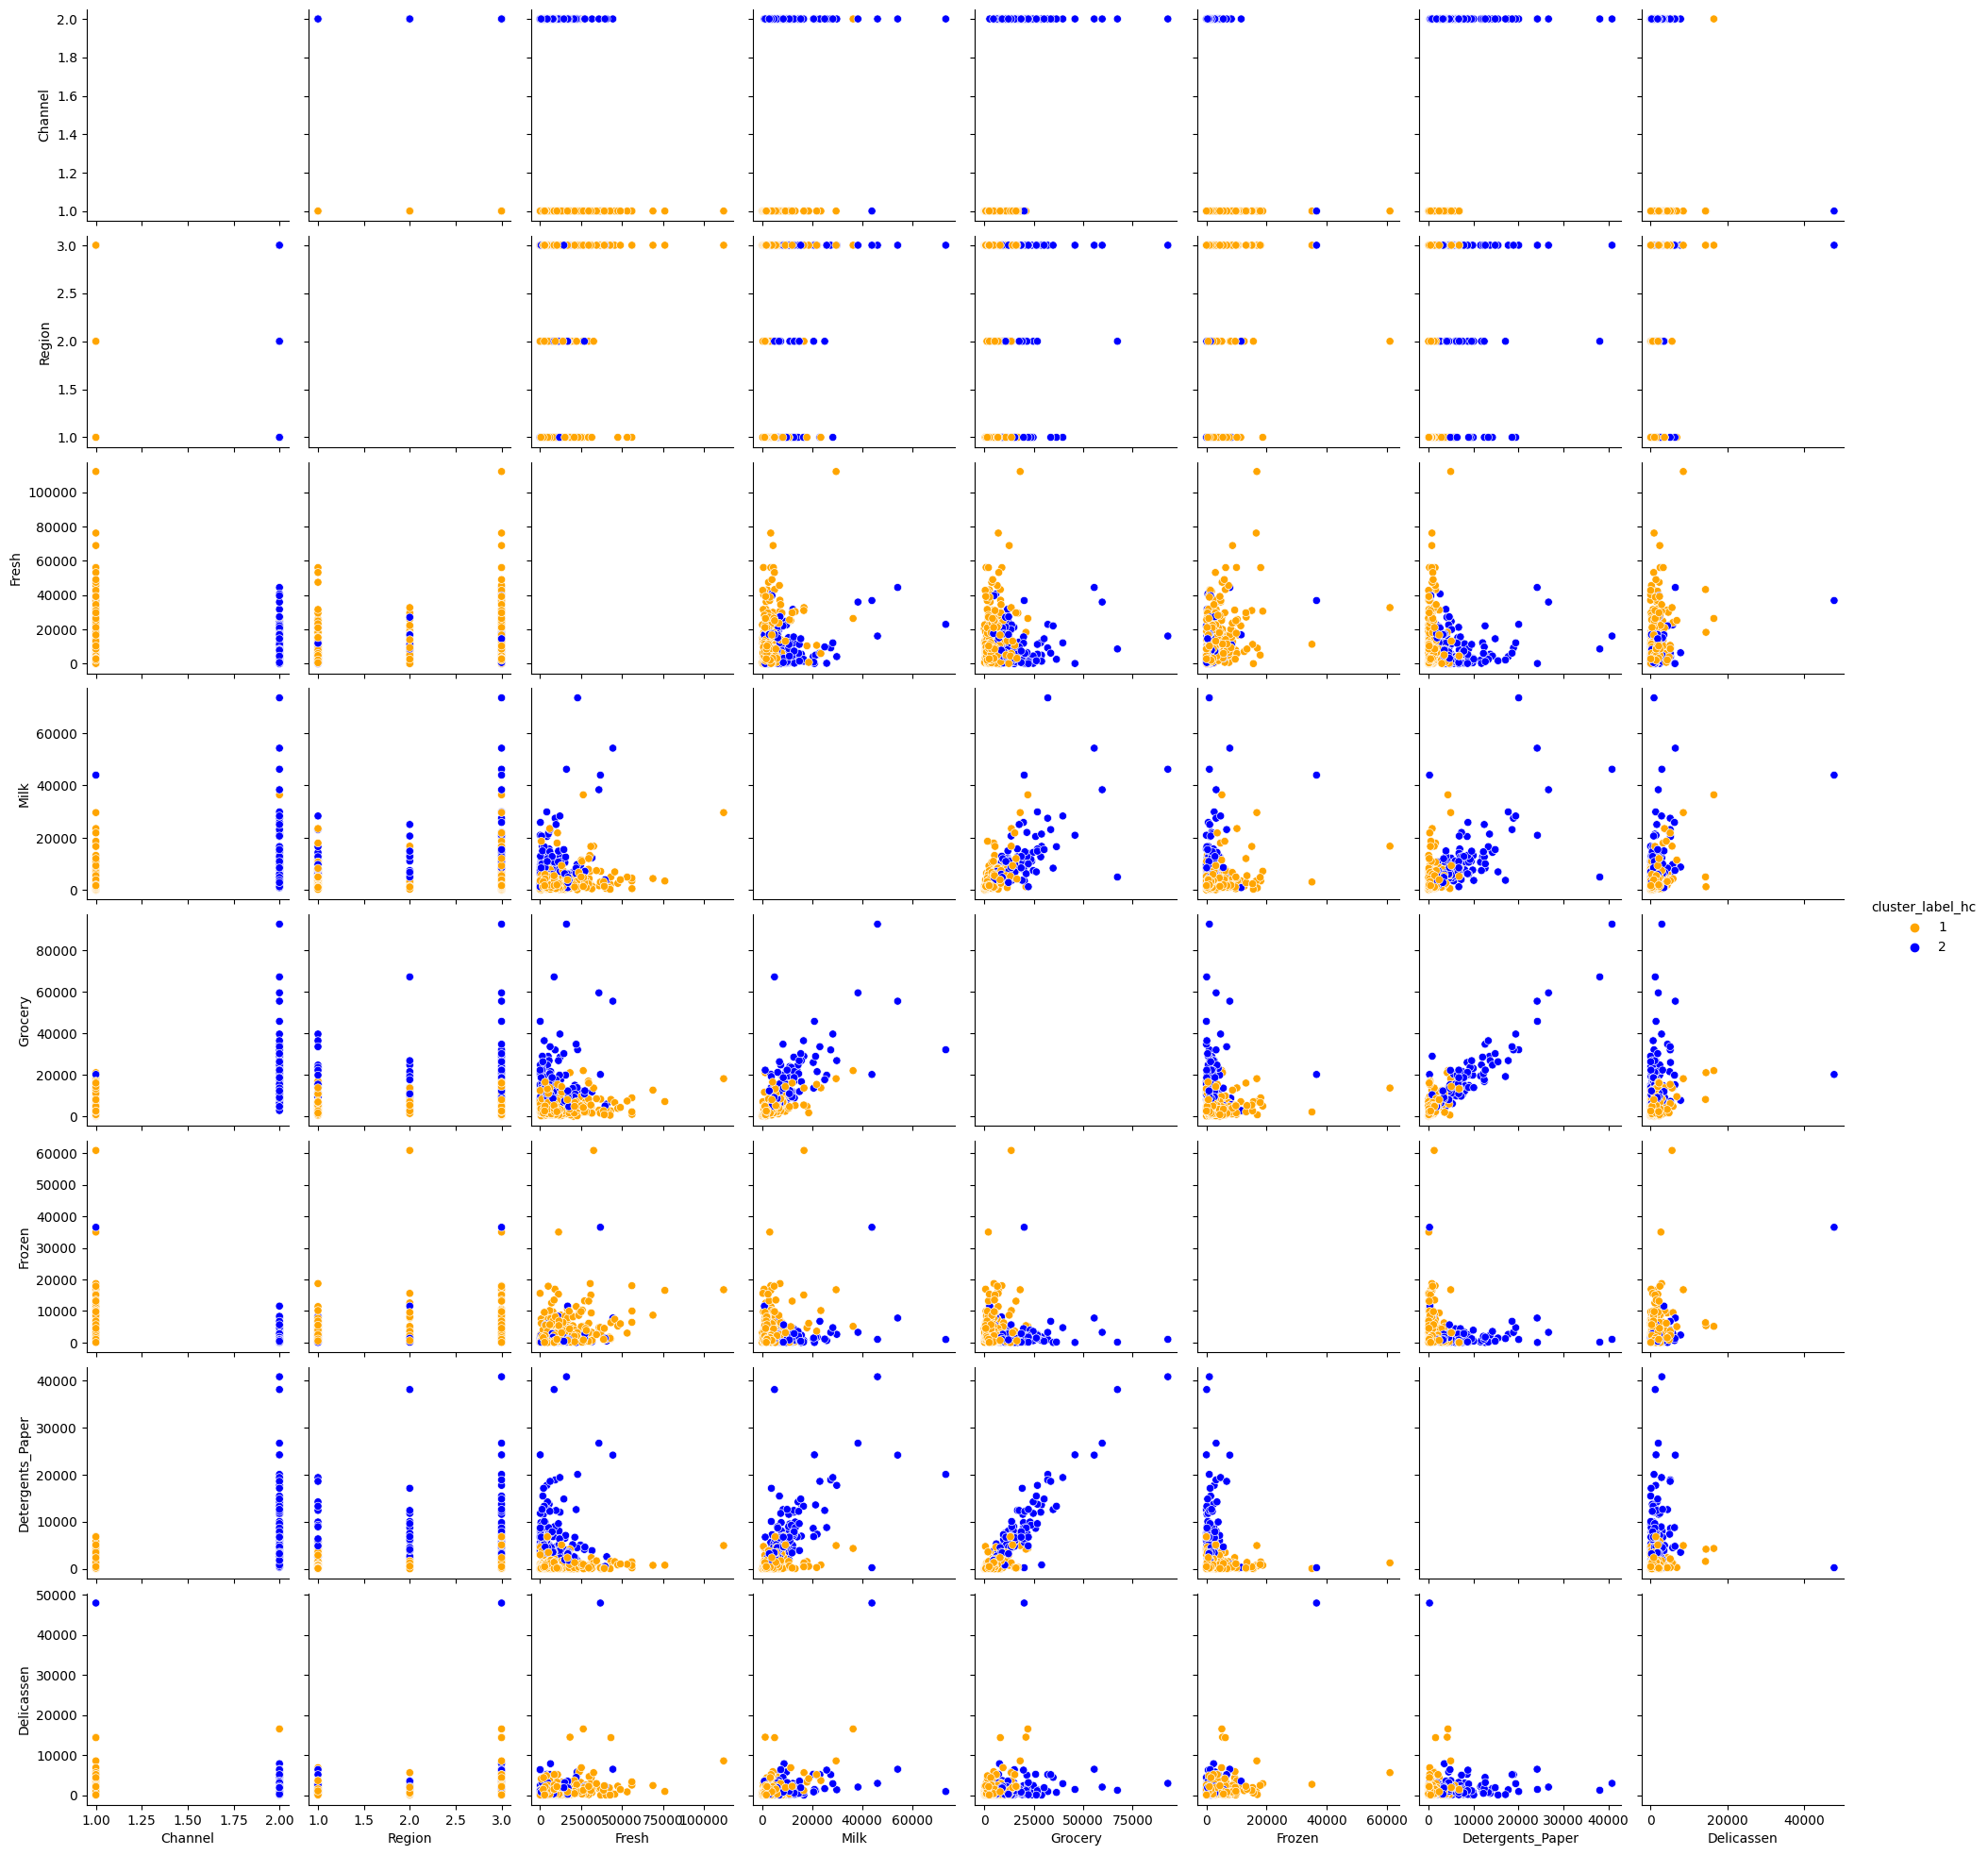

In [106]:
sns.pairplot(data_class_PCA_hc,kind='scatter',diag_kind='None',hue='cluster_label_hc',palette={1:'orange',2:'blue'})

In [107]:
pd.Series(clst_lbl_pca_hc).value_counts()

1    298
2    142
dtype: int64

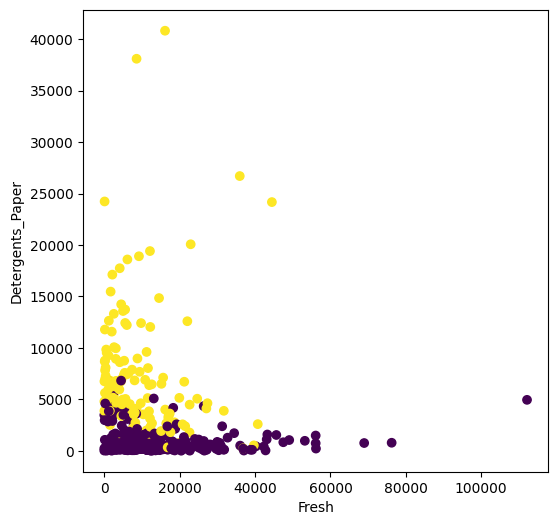

In [108]:
plt.figure(figsize=(6,6))
plt.scatter(x['Fresh'],x['Detergents_Paper'],c = clst_lbl_pca_hc)
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.show()

In [109]:
#of the two PCA plots KMeans gave slightly cleaner visual scatterplots in the original dataset
#when KMeans and HC was done without PCA  Hierarchichal clusttering gave  cleaner clusters than KMeans in the original dataset
